In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import torchvision
from tqdm.notebook import tqdm
import os
import sys

## Custom Imports

In [2]:
os.chdir("../fashion_ml")

In [3]:
from fashion_vae import FashionVAE
from data_loader import EZ_Dataloader
from experiment import FashionML

## Build Data Loader

In [4]:
dl = EZ_Dataloader("FashionMNIST")

In [5]:
dl.build_train_test_loader()

In [6]:
dl.build_val_loader()

## Build VAE

In [7]:
t = dl.train_loader.dataset

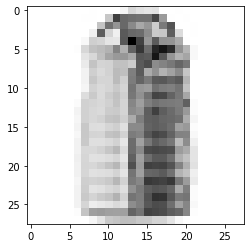

In [8]:
import matplotlib.pyplot as plt
a = t[1][0]
plt.imshow(torch.squeeze(a), cmap = "Greys")

In [9]:
fvae = FashionVAE(h_dims = [32,64,128])

In [10]:
fvae

FashionVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(3, 3), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(3, 3), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(3, 3), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
  )
  (fc_mu): Linear(in_features=128, out_features=2, bias=True)
  (fc_var): Linear(in_features=128, out_features=2, bias=True)
  (decoder_latent_space): Linear(in_features=2, out_features=128, bias=True)
  (decoder): Sequential(
    (0): Sequential(

In [11]:
adam = torch.optim.Adam

In [12]:
fml = FashionML(fvae, dl, adam)

In [13]:
fml.epochs = 100

In [ ]:
fml.fit()

Validation Loss: 2.4228806495666504
Validation Loss: 2.181483030319214
Validation Loss: 2.117114543914795
Validation Loss: 2.081740140914917
Validation Loss: 2.053379535675049
Validation Loss: 2.0404059886932373
Validation Loss: 2.03061842918396
Validation Loss: 2.0231285095214844
Validation Loss: 2.006950855255127
Validation Loss: 2.005913734436035
Validation Loss: 1.9943023920059204
Validation Loss: 1.9899115562438965
Validation Loss: 1.9775205850601196
Validation Loss: 1.9780542850494385
Validation Loss: 1.9720252752304077


In [ ]:
t = fvae.sample(1)

In [ ]:
plt.imshow(torch.squeeze(t.detach().cpu()), cmap = "Greys")

In [ ]:
torch.save(fml.model.state_dict(), "../models/")